In [4]:
%pylab

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
%matplotlib inline
%qtconsole

In [7]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [8]:
k=np.fromfunction(lambda i,j:j>=2,(4,4)).astype(int)

In [9]:
k

array([[0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1]])

In [12]:
i,j = where(k==0)
x=np.vstack([i,j]).T
y = j.reshape(-1,1)*0

In [13]:
i,j = where(k==1)
x=np.vstack([np.vstack([i,j]).T,x])
y = np.vstack([j.reshape(-1,1)*0+1,y])

In [14]:
clf.fit(x,y)
clf.score(x,y)

1.0

## Single element contamination  model 

In [15]:
k[1,0]=1
print k

[[0 0 1 1]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 1]]


In [16]:
i,j = where(k==0)
x=np.vstack([i,j]).T
y = j.reshape(-1,1)*0
i,j = where(k==1)
x=np.vstack([np.vstack([i,j]).T,x])
y = np.vstack([j.reshape(-1,1)*0+1,y])

In [17]:
clf.fit(x,y)
clf.score(x,y)

1.0

## Extract thresholds

[reference ](http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree)

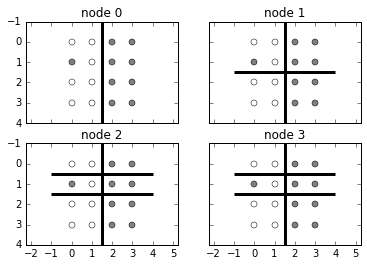

In [18]:
clf.tree_.feature
clf.tree_.threshold
i,_=np.where(y==1)
xi,xj=x[i,:].T
fig,axs=subplots(2,2,sharex=True,sharey=True)
ax=axs[0,0]
ax.set_aspect(1)
ax.axis((-1,4,-1,4))
ax.invert_yaxis()
i,_=np.where(y==0)
xi,xj=x[i,:].T

# same background all on axes
for ax in axs.flat:
    ax.plot(ma.masked_array(x[:,1],y==1),ma.masked_array(x[:,0],y==1),'ow',mec='k')
    ax.plot(ma.masked_array(x[:,1],y==0),ma.masked_array(x[:,0],y==0),'o',color='gray')

lines={'h':[],'v':[]}
nc=0
for i,j,ax in zip(clf.tree_.feature,clf.tree_.threshold,axs.flat):
    ax.set_title('node %d'%(nc))
    nc+=1
    if i==0:
        lines['h'].append(j)
    elif i==1:
        lines['v'].append(j)
    for l in lines['v']:
        ax.vlines(l,-1,4,lw=3)
    for l in lines['h']:
        ax.hlines(l,-1,4,lw=3)

In [19]:
# %qtconsole

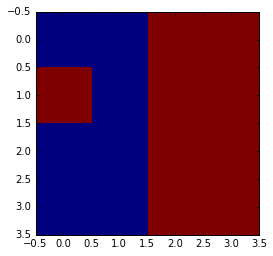

In [20]:
imshow(k,interpolation='nearest')

### Using Random forest classifier

In [21]:
def draw_board(x,y,clf,ax=None):
    if ax is None: fig,ax=subplots()
    xm,ymn=x.min(0).T
    ax.axis(xmin=xm-1,ymin=ymn-1)
    xx,ymx=x.max(0).T
    ax.axis(xmax=xx+1,ymax=ymx+1)
    ax.set_aspect(1)
    ax.invert_yaxis()
    ax.plot(ma.masked_array(x[:,1],y==1),ma.masked_array(x[:,0],y==1),'ow',mec='k')
    ax.plot(ma.masked_array(x[:,1],y==0),ma.masked_array(x[:,0],y==0),'o',color='gray')
    for i,j in zip(clf.tree_.feature,clf.tree_.threshold):
        if i==1:
            ax.vlines(j,-1,6,lw=3.)
        elif i==0:
            ax.hlines(j,-1,6,lw=3.)
    return ax

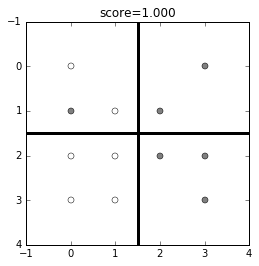

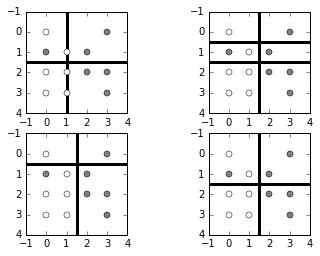

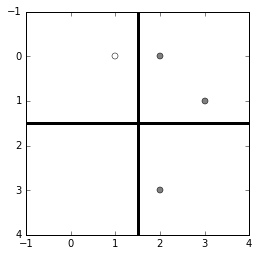

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=123)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)
ax=draw_board(X_train,y_train,clf)
ax.set_title('score=%3.3f'%clf.score(X_test,y_test))
rfc = RandomForestClassifier(n_estimators=4,max_depth=2)
rfc.fit(X_train,y_train.flat)
fig,axs = subplots(2,2)
for est,ax in zip(rfc.estimators_,axs.flat):
    draw_board(X_train,y_train,est,ax=ax)

ax=draw_board(X_test,y_test,clf)
ax.axis((-1,4,-1,4)) 
ax.invert_yaxis()


## Triangular matrix

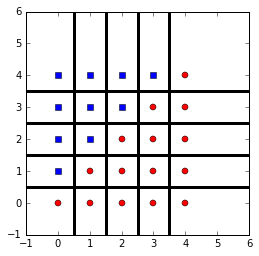

In [23]:
clf = tree.DecisionTreeClassifier()
k=np.tri(5)
y=k.flatten().reshape((-1,1))
i,j=np.indices(k.shape)
x=np.vstack([i.flat,j.flat]).T
i,_=np.where(y==1)
xi,xj=x[i,:].T
fig,ax=subplots()
ax.set_aspect(1)
ax.axis((-1,6,-1,6))
ax.plot(xi,xj,'ro')
i,_=np.where(y==0)
xi,xj=x[i,:].T
ax.plot(xi,xj,'bs')
clf.fit(x,y)

for i,j in zip(clf.tree_.feature,clf.tree_.threshold):
    if i==1:
        ax.hlines(j,-1,6,lw=3.)
    else:
        ax.vlines(j,-1,6,lw=3.)

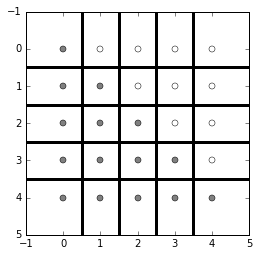

In [24]:
i,j = np.indices((5,5))
x=np.vstack([i.flatten(),j.flatten()]).T
y=(x[:,0]>=x[:,1]).astype(int).reshape((-1,1))
clf.fit(x,y)
fig,ax=subplots()
ax.axis((-1,5,-1,5))
ax.set_aspect(1)
ax.invert_yaxis()

ax.plot(ma.masked_array(x[:,1],y==1),ma.masked_array(x[:,0],y==1),'ow',mec='k')
ax.plot(ma.masked_array(x[:,1],y==0),ma.masked_array(x[:,0],y==0),'o',color='gray')
for i,j in zip(clf.tree_.feature,clf.tree_.threshold):
    if i==1:
        ax.hlines(j,-1,6,lw=3.)
    else:
        ax.vlines(j,-1,6,lw=3.)
        
        

In [25]:
k=np.zeros((5,5),dtype=np.int)
for i,j,m in zip(x[:,0],x[:,1],y[:,0]):
    k[i,j]=m
print k

[[1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]
 [1 1 1 1 1]]


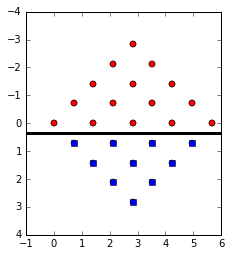

In [26]:
rotation_matrix=np.matrix([[cos(pi/4),sin(pi/4)],[-sin(pi/4),cos(pi/4)]])
i,j=rotation_matrix*(x.T)
fig,ax=subplots()
ax.set_aspect(1)
# ax.axis(xmin=-1,max=4)
# ax.invert_yaxis()
ax.axis(xmin=-1,xmax=6,ymin=-4,ymax=4)
ax.invert_yaxis()
ax.plot(i,j,'og');
mi=ma.masked_array(array(i),y==1)
mj=ma.masked_array(array(j),y==1)
ax.plot(mi,mj,'sb');
mi=ma.masked_array(array(i),y==0)
mj=ma.masked_array(array(j),y==0)
ax.plot(mi,mj,'ro');

xr=(rotation_matrix*(x.T)).T
clf.fit(xr,y)

for i,j in zip(clf.tree_.feature,clf.tree_.threshold):
    if i==1:
        ax.hlines(j,-1,6,lw=3.)
    else:
        ax.vlines(j,-1,6,lw=3.)

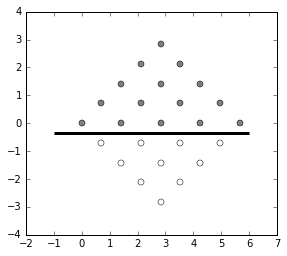

In [27]:
rotation_matrix=np.matrix([[cos(pi/4),-sin(pi/4)],[sin(pi/4),cos(pi/4)]])
xr=(rotation_matrix*(x.T)).T
xr=np.array(xr)

fig,ax=subplots()
ax.set_aspect(1)
ax.axis(xmin=-2,xmax=7,ymin=-4,ymax=4)
# ax.invert_yaxis()

ax.plot(ma.masked_array(xr[:,1],y==1),ma.masked_array(xr[:,0],y==1),'ow',mec='k')
ax.plot(ma.masked_array(xr[:,1],y==0),ma.masked_array(xr[:,0],y==0),'o',color='gray')

clf.fit(xr,y)

for i,j in zip(clf.tree_.feature,clf.tree_.threshold):
    if i==1:
        ax.vlines(j,-1,6,lw=3.)
    elif i==0:
        ax.hlines(j,-1,6,lw=3.)

## Draw tree

In [28]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("example_tree.png") 

ImportError: No module named pydot